### Install Pytorch and YOLOV5

In [1]:
# !pip install torch==1.8.2+cu111 torchvision==0.9.2+cu111 torchaudio===0.8.2 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

In [2]:
# Run once - Clone repo into directory
# !git clone https://github.com/ultralytics/yolov5

In [3]:
# !cd yolov5 & pip install -r requirements.txt

In [4]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [5]:
# Load pre-trained model for testing
# model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

In [6]:
# Show model layers - YOLO is a CNN model
# model

### Making Predictions with Pre Trained YOLOv5 Model On Images

In [7]:
# Test out making detections
# img = 'https://931600.smushcdn.com/2399578/wp-content/uploads/2020/09/Aug-7-39.jpg?size=1320x880&lossy=1&strip=1&webp=1'

In [8]:
# results = model(img)
# results.print()

In [9]:
# %matplotlib inline
# plt.imshow(np.squeeze(results.render()))
# plt.show()

In [10]:
# For each object

# results.xyxy

In [11]:
# results.show()
# results.print()

### Making Predictions for Pre Trained YOLOv5 Model on Video

In [12]:
# cap = cv2.VideoCapture('./Videos/TrafficTest.mp4')
# while cap.isOpened():
#     ret, frame = cap.read()
#     # Make Detections
#     results = model(frame)
#     # results.print()
#     cv2.imshow('YOLO', np.squeeze(results.render()))
#     # Exit loop
#     if cv2.waitKey(10) & 0xFF == ord('q'):
#         break
# cap.release()
# cv2.destroyAllWindows()

### Train Custom Model

In [13]:
# Run once to clone repo
# !git clone https://github.com/tzutalin/labelImg

In [14]:
# !pip install pyqt5 lxml --upgrade
# !cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [15]:
# Train custom model
# !cd yolov5 && python train.py --img 320 --batch 4 --epochs 50 --data dataset.yaml --weights yolov5s.pt --workers 2

### Test Trained Model

In [16]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='./TrainedYoloModel/best3.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\dojh1/.cache\torch\hub\master.zip
YOLOv5  2022-4-2 torch 1.8.2+cu111 CUDA:0 (NVIDIA GeForce GTX 1060 3GB, 3072MiB)

Fusing layers... 
Model summary: 213 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [17]:
img = './TestImages/Screenshot 2022-03-20 161952.png'
results = model(img)
results.print()

image 1/1: 771x357 1 bunnylogo, 1 nuslogo
Speed: 10.0ms pre-process, 13.0ms inference, 3.0ms NMS per image at shape (1, 3, 640, 320)


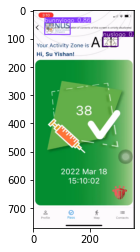

In [18]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [19]:
# Print on bigger window
# results.show()
results.xyxy
print(len(results.xyxy[0]))

2


In [20]:
# Calculate speed and direction coordinates
def calculate_direction(coordinates, prev_X, prev_Y):
    movement = ''
    rate_of_change = ''
    # print('x = ' + str(coordinates[0][0]) + ' ' + 'y = ' + str(coordinates[0][1]))
    # Focus on a single logo
    newX = coordinates[0][0]
    newY = coordinates[0][1]
    change_in_position_x = abs(newX - prev_X)
    change_in_position_y = abs(newY - prev_Y)
    if change_in_position_y < change_in_position_x:
        movement = 'Horizontal'
        rate_of_change = change_in_position_x
    else:
        movement = 'Vertical'
        rate_of_change = change_in_position_y
    return newX, newY, movement, rate_of_change

In [21]:
cap = cv2.VideoCapture('./Videos/1_Logo_Fast.mp4')
total_movement_sets = 10
frame_limit = 5
previous_x = 0
previous_y = 0
movement_sets = 0
frame_count = 0

change_rates = []
directions = []

while cap.isOpened() and movement_sets < total_movement_sets:
    ret, frame = cap.read()
    # Make Detections
    results = model(frame)
    cv2.imshow('YOLO', np.squeeze(results.render()))
    if frame_count == frame_limit:
        # xyxy = xmin, ymin, xmax, ymax, confidence, class
        coordinates = results.xyxy[0]
        detections = len(coordinates)
        if detections != 0:
            newX, newY, direction, change_rate = calculate_direction(coordinates, previous_x, previous_y)
            previous_x = newX
            previous_y = newY
            directions.append(direction)
            change_rates.append(change_rate)
        else:
            print('Unable to Detect Images')
            directions.append('STATIC')
        movement_sets += 1
        frame_count = 0
    frame_count += 1
    # Exit loop
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

Unable to Detect Images
Unable to Detect Images
Unable to Detect Images
Unable to Detect Images
Unable to Detect Images
Unable to Detect Images
Unable to Detect Images
Unable to Detect Images
Unable to Detect Images
Unable to Detect Images


In [22]:
# change_rates

In [23]:
# directions

In [24]:
def aggregate_velocity(change_rates):
    if len(change_rates) == 0:
        return
    total_change = 0
    for rate in change_rates:
        total_change += rate
    return total_change/len(change_rates)

def aggregate_direction(directions):
    horizontal_count = 0
    vertical_count = 0
    no_direction = 0
    for direction in directions:
        if direction == 'Horizontal':
            horizontal_count += 1
        elif direction == 'Vertical':
            vertical_count += 1
        else:
            no_direction += 1
    print(horizontal_count)
    print(vertical_count)
    print(no_direction)
    if no_direction > horizontal_count and no_direction > vertical_count:
        return 'No Logo Detectable'
    if horizontal_count > vertical_count:
        return 'Horizontal'
    return 'Vertical'

In [25]:
average_velocity = aggregate_velocity(change_rates)
predicted_direction = aggregate_direction(directions)

print(average_velocity)
print(predicted_direction)

10
0
0
tensor(123.96392, device='cuda:0')
Horizontal
